## 1. 형태소 분석 라이브러리 로드

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import rhinoMorph
rn = rhinoMorph.startRhino()

base_dir_path = "/home/deeplearning/Downloads/models/feedback/"
qna_level_path_상 = base_dir_path + 'recommend/aihub_qna_level_utf8sig.csv'
qna_level_path_상중하 = base_dir_path + 'recommend/aihub_qna_level_total_utf8sig.csv'
어휘사전 = base_dir_path + "dictionary/어휘.csv"
어휘사전1 = base_dir_path + "dictionary/1047070_30000.xls"
어휘사전2 = base_dir_path + "dictionary/1047070_51959.xls"

pos = ["NNG", "VV", "VA", "MAG"] # , "MM", "NNP", "NNB", "NP", "NR"
eomi=True

filepath:  /home/deeplearning/Downloads/models/vitual_env/lib/python3.10/site-packages
classpath:  /home/deeplearning/Downloads/models/vitual_env/lib/python3.10/site-packages/rhinoMorph/lib/rhino.jar
Constructing Dictionaries...
Current mode: python	Current path: /home/deeplearning/Downloads/models/vitual_env/lib/python3.10/site-packages/rhinoMorph/resource/
Constructing Dictionaries Completed.
RHINO started!



In [2]:
pd.read_csv(qna_level_path_상)

,Question,AnswerLabelText,SentenceSpeechLV,question_label
0,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,집에서 배달을 자주 시켜 먹습니다 첫 번째는 먹고 싶은 음식을 언제 어디서든 편안하...,상,316
1,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,저는 한국에서 배달을 시켜요 저희가 식구가 많아 배달을 시켜 먹기가 편하고 코로나 ...,상,316
2,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,요즘 외식을 할 때는 배달을 쓰는 경우가 많습니다 여러 가지 가게에 메뉴들을 한 번...,상,316
3,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,한국에서 외식 외식할 때는 식당에 가서 먹을 때가 많았었는데 코로나 때문에 요즘은 ...,상,316
4,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,아무래도 배달을 시키는 경우가 많은 거 같아요 코로나 상황 때문에 그런 것도 있고요...,상,316
...,...,...,...,...
85635,"한국의 숙박업소(예: 호텔, 모텔, 게스트하우스, 펜션, 에어비앤비, 여관)에 묵어...",저는 모텔에 묵어본 적이 있어요 거기 너무 신기해요 너무 좋았어요 컴퓨터도 있고 그...,상,353
85636,여러분 나라의 학교와 한국의 학교는 무엇이 가장 다릅니까?,우리 나라의 학교와 한국의 학교는 시설과 장비들이 가장 다릅니다,상,131
85637,여러분 나라에서 인기가 많은 직업은 무엇입니까? 세 가지만 말해 보세요. 왜 그 직...,태국에서는 가장 인기가 많은 직업은 승무원 공무원 그리고 연예인이에요 아시다시피 연...,상,130
85638,여러분의 나라와 한국의 날씨는 어떻게 다릅니까?,한국은 사계절 있어서 좋아요 태국에는 일 년 내내 여름이라 더워요,상,140


## 2. 모든 대답 문장 형태소 분석

In [4]:
# [상중하]대답 문장을 받아 형태소 분석을 한 뒤, 중복 제거
import pandas as pd

df = pd.read_csv(qna_level_path_상중하)
# answer_df = df[['AnswerLabelText', 'SentenceSpeechLV']]
answer_df = df
answer_df['질문_형태소분석'] = answer_df['Question'].apply(lambda x: set(rhinoMorph.onlyMorph_list(rn, x, pos=pos, eomi=True)))
answer_df['답변_형태소분석'] = answer_df['AnswerLabelText'].apply(lambda x: set(rhinoMorph.onlyMorph_list(rn, x, pos=pos, eomi=True)))

#평균((답변형태소-질문형태소)- 1급이나2급의단어)
answer_df['diff_단어'] = answer_df['답변_형태소분석'] - answer_df['질문_형태소분석']
answer_df.to_csv('형태소분석_상중하_문장.csv', encoding='utf-8-sig', index=False)
answer_df

,Question,AnswerLabelText,SentenceSpeechLV,question_label,질문_형태소분석,답변_형태소분석,diff_단어
0,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,저는 외식할 때 보통 배달을 시킵니다 이유는 그냥 편안한 것도 있고 조금만 기다리면...,중,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{바로, 이유, 보통, 때, 하다, 있다, 조금, 음식, 그냥, 좋다, 같다, 편안...","{바로, 기다리다, 음식, 보통, 있다, 조금, 좋다, 같다, 그냥, 퀄리티, 고,..."
1,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,한국에서 외식할 때는 식당에 가서 먹는 편입니다 그 이유는 배달을 하거나 포장을 하...,중,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{가다, 쓰레기, 이유, 때, 하다, 나중, 나다, 식당, 편입, 먹다, 귀찮다, ...","{쓰레기, 나중, 나다, 편입, 귀찮다, 포장}"
2,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,집에서 배달을 자주 시켜 먹습니다 첫 번째는 먹고 싶은 음식을 언제 어디서든 편안하...,상,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{사람, 자주, 음식, 시키다, 있다, 두렵다, 집, 먹다, 인하다, 곳, 배달}","{두렵다, 음식, 사람, 자주, 있다, 집, 인하다, 곳}"
3,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,코로나 중에는 애 때문에 놀이터가 있는 식당에 갔었는데 요즘은 무서워서 배달로 시켜...,중,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{가다, 끝나다, 좋다, 요즘, 시키다, 있다, 같다, 집, 티브이, 놀이터, 식당...","{끝나다, 좋다, 있다, 같다, 요즘, 집, 티브이, 놀이터, 무섭다, 편하다, 애..."
4,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,저는 한국에서 배달을 시켜요 저희가 식구가 많아 배달을 시켜 먹기가 편하고 코로나 ...,상,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{가다, 먹, 시키다, 식당, 편하다, 식구, 많다, 배달}","{많다, 식구, 편하다, 먹}"
...,...,...,...,...,...,...,...
232326,서울의 버스는 거리별로 색깔이 다릅니다. 이전에 살던 곳의 버스도 색깔이 다양한가요...,어/ 제 나라는 버스의 색깔이 어/ 별로 다르지 않아요 그리고 한국의 버스들과는 비...,하,100,"{거리, 어떻하다, 하다, 이전, 다르다, 살다, 색깔, 곳, 다양, 버스}","{너무, 쓰다, 게이, 다르다, 낡다, 별로, 나라, 색깔, 없다, 버스}","{쓰다, 너무, 없다, 게이, 별로, 나라, 낡다}"
232327,서울에서 어떤 색깔의 택시를 보셨나요? 다른 나라 도시에서 본 택시 색깔을 모두 말...,서울에서는 까만 색깔 택시 있고 그리고 일반 택시 있는 거 같아요 태국에는 일반 택...,중,99,"{택시, 말하다, 모두, 도시, 나라, 색깔, 보다}","{까맣다, 택시, 있다, 같다, 따라서, 그냥, 다르다, 회사, 달라, 일반, 색깔}","{까맣다, 따라서, 있다, 같다, 그냥, 일반, 다르다, 달라, 회사}"
232328,서울에서 어떤 색깔의 택시를 보셨나요? 다른 나라 도시에서 본 택시 색깔을 모두 말...,서울에서 어떤 색깔의 택시를 보셨나요 다른 나라 도시에 본 택시 색깔은 모두 말해 ...,중,99,"{택시, 말하다, 모두, 도시, 나라, 색깔, 보다}","{택시, 파란색, 핑크, 있다, 같다, 초록색, 회색, 말하다, 색, 까다, 모두,...","{까다, 파란색, 초록색, 같다, 있다, 엄청, 회색, 오렌지, 색, 경우, 핑크,..."
232329,서울에서 어떤 색깔의 택시를 보셨나요? 다른 나라 도시에서 본 택시 색깔을 모두 말...,서울에서 하얀 택시도 봤고 검정 택시 모범택시도 봤습니다 태국에서는 그냥 일반 택시...,중,99,"{택시, 말하다, 모두, 도시, 나라, 색깔, 보다}","{하얗다, 모범, 택시, 있다, 녹색, 같다, 노란색, 검정, 그냥, 모범택시, 일...","{하얗다, 모범, 녹색, 같다, 있다, 노란색, 검정, 그냥, 모범택시, 일반, 파..."


## 3. 어휘 등급 사전 테이블 생성

In [5]:
어휘_df = pd.concat([pd.read_excel(어휘사전1), pd.read_excel(어휘사전2)], axis=0)
어휘_df = 어휘_df[['표제어', '동형어 번호', '구분', '품사', '활용', '파생어', '가봐라', '어휘 등급']]
어휘_df  # 74930
어휘_df = 어휘_df[(어휘_df['동형어 번호'] == 0) | (어휘_df['동형어 번호'] == 1)]  # 68004
어휘_df = 어휘_df[어휘_df['구분'] == '단어']  # 62934
어휘_df = 어휘_df[(어휘_df['품사'] == '명사') | (어휘_df['품사'] == '동사')| (어휘_df['품사'] == '형용사')]  # 55195
어휘_df = 어휘_df[어휘_df['어휘 등급'] != '없음']  # 15656
어휘_df = 어휘_df[어휘_df.duplicated(subset='표제어',keep='first')] # 6904
어휘_df = 어휘_df[['표제어', '어휘 등급', '품사', '활용', '파생어', '가봐라']]
어휘_df

,표제어,어휘 등급,품사,활용,파생어,가봐라
1,가,고급,명사,NaN,NaN,NaN
49,가곡,고급,명사,"가곡이[가고기], 가곡도[가곡또], 가곡만[가공만]",NaN,NaN
71,가구,고급,명사,NaN,NaN,NaN
90,가까이,초급,명사,NaN,가까이하다0,NaN
98,가깝다,초급,형용사,"가까운[가까운], 가까워[가까워], 가까우니[가까우니], 가깝습니다[가깝씀니다]",NaN,NaN
...,...,...,...,...,...,...
30890,힘쓰다,중급,동사,"힘써, 힘쓰니",NaN,NaN
30892,힘없다,고급,형용사,"힘없는[히멈는], 힘없어[히멉써], 힘없으니[히멉쓰니], 힘없습니다[히멉씀니다], ...",힘없이,NaN
30896,힘입다,고급,동사,"힘입어[힘니버], 힘입으니[힘니브니], 힘입는[힘님는]",NaN,NaN
30897,힘입다,고급,동사,"힘입어[힘니버], 힘입으니[힘니브니], 힘입는[힘님는]",NaN,NaN


In [6]:
import re
voca = pd.read_csv(어휘사전, index_col="전체 번호").fillna("")
voca = voca[['어휘', '등급']]
def regex(text):
    result = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣ ]", " ", text)
    return result.split()[0]
voca['어휘_'] = voca['어휘'].apply(regex)
voca['등급_'] = voca['등급'].str.replace('급', '')
# voca.to_csv('voca.csv', encoding='utf-8-sig', index=False)
voca.reset_index(drop=True, inplace=True)
voca_rating_df = voca[['어휘_', '등급_']]
voca_rating_df['등급_'] = voca_rating_df['등급_'].astype('int')
# voca_rating_df['어휘평균'] = voca_rating_df.groupby('어휘_')['등급_'].transform('mean')
voca_rating_df = voca_rating_df.sort_values(by='어휘_')
voca_rating_df = voca_rating_df.drop_duplicates(subset=['어휘_'], keep="first").reset_index(drop=True)
voca_rating_df

/tmp/ipykernel_201025/1132737986.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voca_rating_df['등급_'] = voca_rating_df['등급_'].astype('int')


,어휘_,등급_
0,가,4
1,가게,1
2,가격,1
3,가계,6
4,가곡,5
...,...,...
9989,힘없다,5
9990,힘없이,4
9991,힘입다,6
9992,힘주다,5


In [7]:
A = 어휘_df[['표제어', '어휘 등급']]
A.columns = ['어휘_', '등급_']
B = voca_rating_df
total_voca_df = pd.concat([A, B], axis=0)
total_voca_df = total_voca_df.sort_values(['어휘_', '등급_'])
total_voca_df = total_voca_df.drop_duplicates(subset=['어휘_'], keep="first").reset_index(drop=True)
total_voca_df.drop(total_voca_df[total_voca_df['등급_']=='초급'].index,inplace=True)
total_voca_df['등급_'].unique()

array([4, 1, 6, 5, 2, 3], dtype=object)

In [8]:
total_voca_df.to_csv('어휘별등급테이블.csv', encoding='utf-8-sig', index=False)
total_voca_df

,어휘_,등급_
0,가,4
1,가게,1
2,가격,1
3,가계,6
4,가곡,5
...,...,...
9990,힘없다,5
9991,힘없이,4
9992,힘입다,6
9993,힘주다,5


## 4. 대답한 문장과 어휘 테이블을 근거로 어휘 수준 지표 만들기

In [10]:
from tqdm import tqdm
tqdm.pandas()

def sum_word_rate(list_data):
    # 어휘등급사전에 없는 것을 포함해 나눠주지 말자.
    result = []
    count = 0
    for word in list_data:
        temp = total_voca_df[total_voca_df['어휘_']==word]['등급_'].values
        if len(temp):
            count += 1
            result.append(temp[0])
    if count != 0:
        return sum(result)/count
    else:
        return 0
answer_df['단어등급']=answer_df['diff_단어'].progress_apply(sum_word_rate)
    
def sum_word_dict_rate(list_data):
    word_dict = {}
    for word in list_data:
        temp = total_voca_df[total_voca_df['어휘_']==word]['등급_'].values
        if len(temp):
            word_dict[word] = temp[0]
    word_dict_sort = sorted(word_dict.items(), key=lambda x:x[1], reverse=True)
    return word_dict_sort
answer_df['단어개별등급']=answer_df['diff_단어'].progress_apply(sum_word_dict_rate)
answer_df

100%|██████████| 232331/232331 [20:15<00:00, 191.15it/s]


,Question,AnswerLabelText,SentenceSpeechLV,question_label,질문_형태소분석,답변_형태소분석,diff_단어,단어등급,단어개별등급
0,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,저는 외식할 때 보통 배달을 시킵니다 이유는 그냥 편안한 것도 있고 조금만 기다리면...,중,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{바로, 이유, 보통, 때, 하다, 있다, 조금, 음식, 그냥, 좋다, 같다, 편안...","{바로, 기다리다, 음식, 보통, 있다, 조금, 좋다, 같다, 그냥, 퀄리티, 고,...",1.545455,"[(고, 5), (그냥, 2), (편안, 2), (바로, 1), (기다리다, 1),..."
1,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,한국에서 외식할 때는 식당에 가서 먹는 편입니다 그 이유는 배달을 하거나 포장을 하...,중,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{가다, 쓰레기, 이유, 때, 하다, 나중, 나다, 식당, 편입, 먹다, 귀찮다, ...","{쓰레기, 나중, 나다, 편입, 귀찮다, 포장}",2.833333,"[(편입, 6), (포장, 5), (쓰레기, 2), (귀찮다, 2), (나중, 1)..."
2,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,집에서 배달을 자주 시켜 먹습니다 첫 번째는 먹고 싶은 음식을 언제 어디서든 편안하...,상,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{사람, 자주, 음식, 시키다, 있다, 두렵다, 집, 먹다, 인하다, 곳, 배달}","{두렵다, 음식, 사람, 자주, 있다, 집, 인하다, 곳}",2.875000,"[(집, 6), (자주, 5), (두렵다, 4), (인하다, 4), (음식, 1),..."
3,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,코로나 중에는 애 때문에 놀이터가 있는 식당에 갔었는데 요즘은 무서워서 배달로 시켜...,중,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{가다, 끝나다, 좋다, 요즘, 시키다, 있다, 같다, 집, 티브이, 놀이터, 식당...","{끝나다, 좋다, 있다, 같다, 요즘, 집, 티브이, 놀이터, 무섭다, 편하다, 애...",2.090909,"[(집, 6), (애, 4), (놀이터, 3), (무섭다, 2), (편하다, 2),..."
4,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,저는 한국에서 배달을 시켜요 저희가 식구가 많아 배달을 시켜 먹기가 편하고 코로나 ...,상,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{가다, 먹, 시키다, 식당, 편하다, 식구, 많다, 배달}","{많다, 식구, 편하다, 먹}",1.666667,"[(식구, 2), (편하다, 2), (많다, 1)]"
...,...,...,...,...,...,...,...,...,...
232326,서울의 버스는 거리별로 색깔이 다릅니다. 이전에 살던 곳의 버스도 색깔이 다양한가요...,어/ 제 나라는 버스의 색깔이 어/ 별로 다르지 않아요 그리고 한국의 버스들과는 비...,하,100,"{거리, 어떻하다, 하다, 이전, 다르다, 살다, 색깔, 곳, 다양, 버스}","{너무, 쓰다, 게이, 다르다, 낡다, 별로, 나라, 색깔, 없다, 버스}","{쓰다, 너무, 없다, 게이, 별로, 나라, 낡다}",1.333333,"[(낡다, 3), (쓰다, 1), (너무, 1), (없다, 1), (별로, 1), ..."
232327,서울에서 어떤 색깔의 택시를 보셨나요? 다른 나라 도시에서 본 택시 색깔을 모두 말...,서울에서는 까만 색깔 택시 있고 그리고 일반 택시 있는 거 같아요 태국에는 일반 택...,중,99,"{택시, 말하다, 모두, 도시, 나라, 색깔, 보다}","{까맣다, 택시, 있다, 같다, 따라서, 그냥, 다르다, 회사, 달라, 일반, 색깔}","{까맣다, 따라서, 있다, 같다, 그냥, 일반, 다르다, 달라, 회사}",1.750000,"[(따라서, 3), (일반, 3), (까맣다, 2), (그냥, 2), (있다, 1)..."
232328,서울에서 어떤 색깔의 택시를 보셨나요? 다른 나라 도시에서 본 택시 색깔을 모두 말...,서울에서 어떤 색깔의 택시를 보셨나요 다른 나라 도시에 본 택시 색깔은 모두 말해 ...,중,99,"{택시, 말하다, 모두, 도시, 나라, 색깔, 보다}","{택시, 파란색, 핑크, 있다, 같다, 초록색, 회색, 말하다, 색, 까다, 모두,...","{까다, 파란색, 초록색, 같다, 있다, 엄청, 회색, 오렌지, 색, 경우, 핑크,...",2.090909,"[(엄청, 5), (까다, 3), (경우, 3), (파란색, 2), (초록색, 2)..."
232329,서울에서 어떤 색깔의 택시를 보셨나요? 다른 나라 도시에서 본 택시 색깔을 모두 말...,서울에서 하얀 택시도 봤고 검정 택시 모범택시도 봤습니다 태국에서는 그냥 일반 택시...,중,99,"{택시, 말하다, 모두, 도시, 나라, 색깔, 보다}","{하얗다, 모범, 택시, 있다, 녹색, 같다, 노란색, 검정, 그냥, 모범택시, 일...","{하얗다, 모범, 녹색, 같다, 있다, 노란색, 검정, 그냥, 모범택시, 일반, 파...",1.833333,"[(모범, 3), (일반, 3), (하얗다, 2), (녹색, 2), (노란색, 2)..."


In [13]:
from tqdm import tqdm
tqdm.pandas()


def x(text):
    text =str(text)
    result = []
    for i in text[1:-1].split('), '):
        k = 0
        for j in i.split('(\''):
            x = j.replace(')','').split("', ")
            for l in x:
                k+=1
                if k%3==0:
                    result.append(x)
    return result

answer_df['x'] = answer_df['단어개별등급'].progress_apply(x)
answer_df

100%|██████████| 232331/232331 [00:06<00:00, 35744.38it/s]


,Question,AnswerLabelText,SentenceSpeechLV,question_label,질문_형태소분석,답변_형태소분석,diff_단어,단어등급,단어개별등급,x
0,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,저는 외식할 때 보통 배달을 시킵니다 이유는 그냥 편안한 것도 있고 조금만 기다리면...,중,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{바로, 이유, 보통, 때, 하다, 있다, 조금, 음식, 그냥, 좋다, 같다, 편안...","{바로, 기다리다, 음식, 보통, 있다, 조금, 좋다, 같다, 그냥, 퀄리티, 고,...",1.545455,"[(고, 5), (그냥, 2), (편안, 2), (바로, 1), (기다리다, 1),...","[[고, 5], [그냥, 2], [편안, 2], [바로, 1], [기다리다, 1],..."
1,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,한국에서 외식할 때는 식당에 가서 먹는 편입니다 그 이유는 배달을 하거나 포장을 하...,중,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{가다, 쓰레기, 이유, 때, 하다, 나중, 나다, 식당, 편입, 먹다, 귀찮다, ...","{쓰레기, 나중, 나다, 편입, 귀찮다, 포장}",2.833333,"[(편입, 6), (포장, 5), (쓰레기, 2), (귀찮다, 2), (나중, 1)...","[[편입, 6], [포장, 5], [쓰레기, 2], [귀찮다, 2], [나중, 1]..."
2,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,집에서 배달을 자주 시켜 먹습니다 첫 번째는 먹고 싶은 음식을 언제 어디서든 편안하...,상,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{사람, 자주, 음식, 시키다, 있다, 두렵다, 집, 먹다, 인하다, 곳, 배달}","{두렵다, 음식, 사람, 자주, 있다, 집, 인하다, 곳}",2.875000,"[(집, 6), (자주, 5), (두렵다, 4), (인하다, 4), (음식, 1),...","[[집, 6], [자주, 5], [두렵다, 4], [인하다, 4], [음식, 1],..."
3,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,코로나 중에는 애 때문에 놀이터가 있는 식당에 갔었는데 요즘은 무서워서 배달로 시켜...,중,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{가다, 끝나다, 좋다, 요즘, 시키다, 있다, 같다, 집, 티브이, 놀이터, 식당...","{끝나다, 좋다, 있다, 같다, 요즘, 집, 티브이, 놀이터, 무섭다, 편하다, 애...",2.090909,"[(집, 6), (애, 4), (놀이터, 3), (무섭다, 2), (편하다, 2),...","[[집, 6], [애, 4], [놀이터, 3], [무섭다, 2], [편하다, 2],..."
4,한국에서 외식할 때 식당에 가서 먹나요? 배달을 시키시나요? 포장하시나요? 왜 그 ...,저는 한국에서 배달을 시켜요 저희가 식구가 많아 배달을 시켜 먹기가 편하고 코로나 ...,상,316,"{가다, 이유, 때, 시키다, 하다, 주다, 식당, 먹다, 이상, 왜, 말하다, 방...","{가다, 먹, 시키다, 식당, 편하다, 식구, 많다, 배달}","{많다, 식구, 편하다, 먹}",1.666667,"[(식구, 2), (편하다, 2), (많다, 1)]","[[식구, 2], [편하다, 2], [많다, 1]]"
...,...,...,...,...,...,...,...,...,...,...
232326,서울의 버스는 거리별로 색깔이 다릅니다. 이전에 살던 곳의 버스도 색깔이 다양한가요...,어/ 제 나라는 버스의 색깔이 어/ 별로 다르지 않아요 그리고 한국의 버스들과는 비...,하,100,"{거리, 어떻하다, 하다, 이전, 다르다, 살다, 색깔, 곳, 다양, 버스}","{너무, 쓰다, 게이, 다르다, 낡다, 별로, 나라, 색깔, 없다, 버스}","{쓰다, 너무, 없다, 게이, 별로, 나라, 낡다}",1.333333,"[(낡다, 3), (쓰다, 1), (너무, 1), (없다, 1), (별로, 1), ...","[[낡다, 3], [쓰다, 1], [너무, 1], [없다, 1], [별로, 1], ..."
232327,서울에서 어떤 색깔의 택시를 보셨나요? 다른 나라 도시에서 본 택시 색깔을 모두 말...,서울에서는 까만 색깔 택시 있고 그리고 일반 택시 있는 거 같아요 태국에는 일반 택...,중,99,"{택시, 말하다, 모두, 도시, 나라, 색깔, 보다}","{까맣다, 택시, 있다, 같다, 따라서, 그냥, 다르다, 회사, 달라, 일반, 색깔}","{까맣다, 따라서, 있다, 같다, 그냥, 일반, 다르다, 달라, 회사}",1.750000,"[(따라서, 3), (일반, 3), (까맣다, 2), (그냥, 2), (있다, 1)...","[[따라서, 3], [일반, 3], [까맣다, 2], [그냥, 2], [있다, 1]..."
232328,서울에서 어떤 색깔의 택시를 보셨나요? 다른 나라 도시에서 본 택시 색깔을 모두 말...,서울에서 어떤 색깔의 택시를 보셨나요 다른 나라 도시에 본 택시 색깔은 모두 말해 ...,중,99,"{택시, 말하다, 모두, 도시, 나라, 색깔, 보다}","{택시, 파란색, 핑크, 있다, 같다, 초록색, 회색, 말하다, 색, 까다, 모두,...","{까다, 파란색, 초록색, 같다, 있다, 엄청, 회색, 오렌지, 색, 경우, 핑크,...",2.090909,"[(엄청, 5), (까다, 3), (경우, 3), (파란색, 2), (초록색, 2)...","[[엄청, 5], [까다, 3], [경우, 3], [파란색, 2], [초록색, 2]..."
232329,서울에서 어떤 색깔의 택시를 보셨나요? 다른 나라 도시에서 본 택시 색깔을 모두 말...,서울에서 하얀 택시도 봤고 검정 택시 모범택시도 봤습니다 태국에서는 그냥 일반 택시...,중,99,"{택시, 말하다, 모두, 도시, 나라, 색깔, 보다}","{하얗다, 모범, 택시, 있다, 녹색, 같다, 노란색, 검정, 그냥, 모범택시, 일...","{하얗다, 모범, 녹색, 같다, 있다, 노란색, 검정, 그냥, 모범택시, 일반, 파...",1.833333,"[(모범, 3), (일반, 3), (하얗다, 2), (녹색, 2), (노란색, 2)...","[[모범, 3], [일반, 3], [하얗다, 2], [녹색, 2], [노란색, 2]..."


/tmp/ipykernel_201025/56028603.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(answer_df[['단어등급']], bins=8)


count    232331.000000
mean          1.837011
std           0.620579
min           0.000000
25%           1.428571
50%           1.800000
75%           2.166667
max           6.000000
Name: 단어등급, dtype: float64

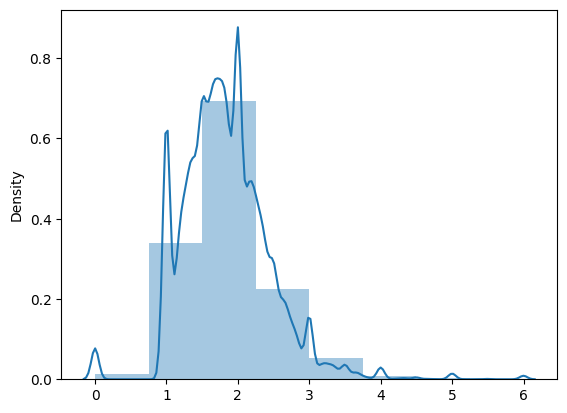

In [31]:
import seaborn as sns
sns.distplot(answer_df[['단어등급']], bins=8)
answer_df['단어등급'].describe()

In [76]:
단어등급환산표 = pd.DataFrame(columns=['백분위', '평균단어등급'])
for i in range(1,21):
    temp_df = pd.DataFrame({'백분위':[i*5], '평균단어등급':[answer_df['단어등급'].quantile(q=i/21, interpolation='nearest')]})
    단어등급환산표 = pd.concat([단어등급환산표, temp_df], ignore_index = True)
단어등급환산표

,백분위,평균단어등급
0,5,1.000000
1,10,1.100000
2,15,1.250000
3,20,1.333333
4,25,1.400000
5,30,1.500000
6,35,1.555556
7,40,1.625000
8,45,1.687500
9,50,1.750000


In [77]:
answer_df.to_csv('형태소분석_상중하_문장_단어등급_합침.csv', encoding='utf-8-sig', index=False)
answer_df.to_pickle('형태소분석_상중하_문장_단어등급_합침.pickle')
단어등급환산표.to_csv('단어등급환산표.csv', encoding='utf-8-sig', index=False)
단어등급환산표.to_pickle('단어등급환산표.pickle')

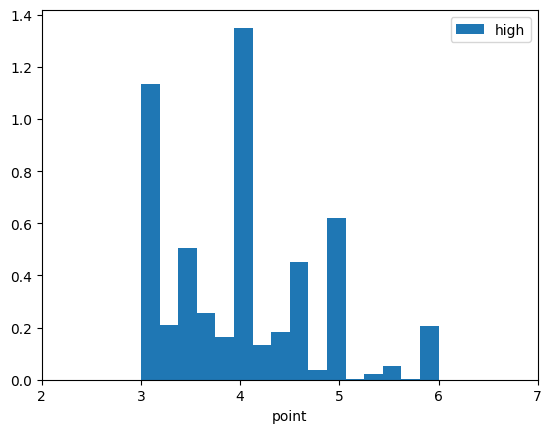

In [48]:
# #상/중/하들의 평균
# #상의 중간값, 평균값, 등의 그래프를 그려보기
# import matplotlib.pyplot as plt
# # nohup jupyter lab --ip=0.0.0.0 --port=8888 --no-browser >> jupyterlab_log.out &
# y1 = answer_df['y']
# plt.hist(y1, bins=16, density=True, histtype='stepfilled', label=r'high', color='C0')
# plt.xlabel('point')
# plt.xlim(2, 7)
# plt.legend()
# plt.show()

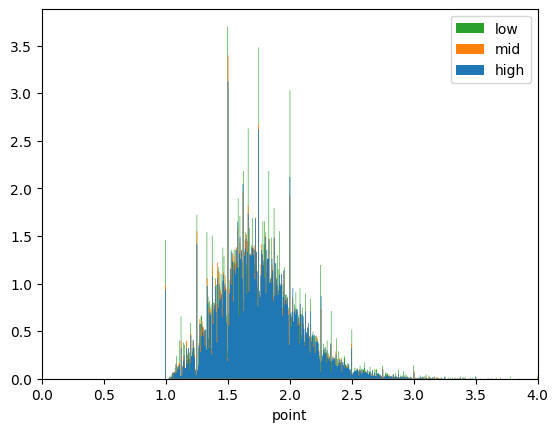

In [51]:
# #상/중/하들의 평균
# #상의 중간값, 평균값, 등의 그래프를 그려보기
# import matplotlib.pyplot as plt
# # nohup jupyter lab --ip=0.0.0.0 --port=8888 --no-browser >> jupyterlab_log.out &
# y1 = answer_df[answer_df['SentenceSpeechLV']=='상']['단어등급']
# y2 = answer_df[answer_df['SentenceSpeechLV']=='중']['단어등급']
# y3 = answer_df[answer_df['SentenceSpeechLV']=='하']['단어등급']
# plt.hist(y3, bins=1000, density=True, histtype='stepfilled', label=r'low', color='C2')
# plt.hist(y2, bins=1000, density=True, histtype='stepfilled', label=r'mid', color='C1')
# plt.hist(y1, bins=1000, density=True, histtype='stepfilled', label=r'high', color='C0')
# plt.xlabel('point')
# plt.xlim(0, 4)
# plt.legend()
# plt.show()

In [ ]:
# answer_df['단어개수'] = answer_df['단어개별등급'].progress_apply(lambda x: len(x))
# answer_df[answer_df['단어개수']==0]

In [98]:
answer_notzero_df = answer_df.drop(answer_df[answer_df['단어개수']==0].index)


In [104]:
answer_notzero_df['상위3개단어평균'] = answer_notzero_df['단어개별등급'].progress_apply(lambda x: sum(word[1] for word in x[:3])/sum(1 for word in x[:3]))
answer_notzero_df['상위5개단어평균'] = answer_notzero_df['단어개별등급'].progress_apply(lambda x: sum(word[1] for word in x[:5])/sum(1 for word in x[:5]))
# answer_df['최고제외상위3개단어평균'] = answer_df['단어개별등급'].progress_apply(lambda x: sum(word[1] for word in x[1:4])/sum(1 for word in x[1:4]))
# answer_df['최고제외상위3개단어평균'] = answer_df['단어개별등급'].progress_apply(lambda x: sum(word[1] for word in x[1:6])/sum(1 for word in x[1:6]))
answer_notzero_df

100%|██████████| 232300/232300 [00:00<00:00, 510865.68it/s]


,AnswerLabelText,SentenceSpeechLV,형태소분석,단어등급,단어개별등급,단어개수,상위3개단어평균,상위5개단어평균
0,저는 외식할 때 보통 배달을 시킵니다 이유는 그냥 편안한 것도 있고 조금만 기다리면...,중,"{좋다, 때, 저, 그냥, 조금, 기다리다, 이유, 먹다, 편안, 보통, 바로, 것...",1.635965,"[(고, 5.0), (수, 3.3333333333333335), (때, 2.5), ...",19,3.611111,2.966667
1,한국에서 외식할 때는 식당에 가서 먹는 편입니다 그 이유는 배달을 하거나 포장을 하...,중,"{포장, 가다, 나다, 한국, 때, 저, 나중, 쓰레기, 것, 먹다, 식당, 이유,...",1.779412,"[(편입, 6.0), (포장, 3.5), (때, 2.5), (쓰레기, 2.0), (...",17,4.000000,3.200000
2,집에서 배달을 자주 시켜 먹습니다 첫 번째는 먹고 싶은 음식을 언제 어디서든 편안하...,상,"{두, 먹다, 여러, 곳, 코로나, 첫, 자주, 것, 있다, 언제, 번, 배달, 수...",1.780702,"[(인하다, 4.0), (두렵다, 4.0), (집, 3.5), (수, 3.33333...",19,3.833333,3.566667
3,코로나 중에는 애 때문에 놀이터가 있는 식당에 갔었는데 요즘은 무서워서 배달로 시켜...,중,"{가다, 좋다, 식당, 먹다, 코로나, 놀이터, 것, 때문, 티브이, 같다, 있다,...",1.675439,"[(집, 3.5), (수, 3.3333333333333335), (놀이터, 3.0)...",19,3.277778,2.966667
4,저는 한국에서 배달을 시켜요 저희가 식구가 많아 배달을 시켜 먹기가 편하고 코로나 ...,상,"{가다, 먹, 한국, 식구, 저, 저희, 식당, 시키다, 때문, 배달, 편하다, 코...",1.475000,"[(식구, 2.0), (저희, 2.0), (배달, 2.0), (편하다, 2.0), ...",10,2.000000,1.950000
...,...,...,...,...,...,...,...,...
232326,어/ 제 나라는 버스의 색깔이 어/ 별로 다르지 않아요 그리고 한국의 버스들과는 비...,하,"{없다, 다르다, 버스, 너무, 한국, 쓰다, 저, 나라, 것, 낡다, 색깔, 별로...",1.333333,"[(낡다, 3.0), (색깔, 2.0), (저, 1.75), (쓰다, 1.25), ...",12,2.250000,1.800000
232327,서울에서는 까만 색깔 택시 있고 그리고 일반 택시 있는 거 같아요 태국에는 일반 택...,중,"{다르다, 일반, 까맣다, 택시, 그냥, 달라, 것, 따라서, 회사, 서울, 태국,...",1.538462,"[(일반, 3.0), (따라서, 3.0), (까맣다, 2.0), (그냥, 2.0),...",13,2.666667,2.400000
232328,서울에서 어떤 색깔의 택시를 보셨나요 다른 나라 도시에 본 택시 색깔은 모두 말해 ...,중,"{많이, 말하다, 파란색, 택시, 나라, 경우, 오렌지, 어떤, 색깔, 것, 모두,...",1.663043,"[(엄청, 5.0), (경우, 3.0), (까다, 3.0), (네, 2.25), (...",23,3.666667,3.050000
232329,서울에서 하얀 택시도 봤고 검정 택시 모범택시도 봤습니다 태국에서는 그냥 일반 택시...,중,"{없다, 녹색, 검정, 일반, 그냥, 택시, 보다, 파란색, 하얗다, 같다, 모범택...",1.625000,"[(일반, 3.0), (모범, 3.0), (녹색, 2.0), (검정, 2.0), (...",16,2.666667,2.400000


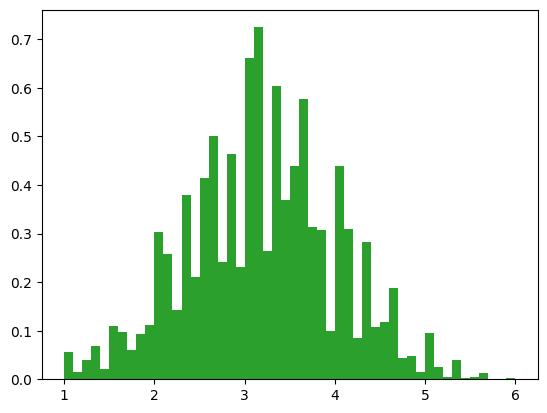

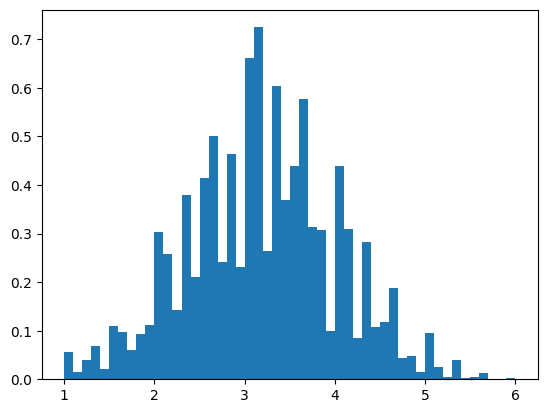

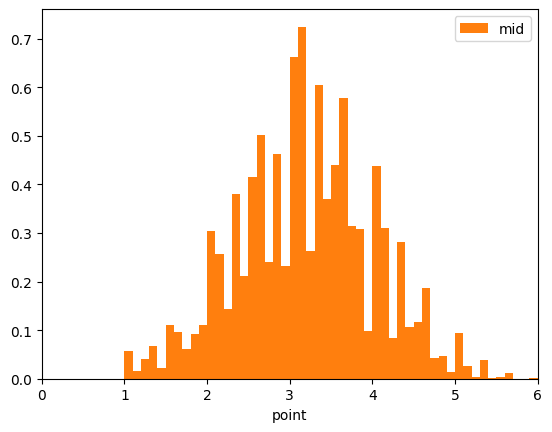

In [113]:
#상/중/하들의 평균
#상의 중간값, 평균값, 등의 그래프를 그려보기
import matplotlib.pyplot as plt
# nohup jupyter lab --ip=0.0.0.0 --port=8888 --no-browser >> jupyterlab_log.out &
y1 = answer_notzero_df[answer_notzero_df['SentenceSpeechLV']=='상']['상위3개단어평균']
y2 = answer_notzero_df[answer_notzero_df['SentenceSpeechLV']=='상']['상위3개단어평균']
y3 = answer_notzero_df[answer_notzero_df['SentenceSpeechLV']=='상']['상위3개단어평균']
plt.hist(y3, bins=50, density=True, histtype='stepfilled', label=r'low', color='C2')
plt.show()
plt.hist(y1, bins=50, density=True, histtype='stepfilled', label=r'high', color='C0')
plt.show()
plt.hist(y2, bins=50, density=True, histtype='stepfilled', label=r'mid', color='C1')
plt.xlabel('point')
plt.xlim(0, 6)
plt.legend()
plt.show()

# 상위 몇개를 뽑아 평균을 내어야 상중하의 구분이 명백해지나
# a = sorted(answer_df['단어개별등급'][0].items(), key=lambda x:x[1], reverse=True)

## 5. 개별 문장 수준 파악

In [ ]:
# 최저 점수 및 분석할 문장 입력
최저점수_100점환산 = 10
question = answer_df.loc[0, 'Question']
answer = answer_df.loc[0, 'AnswerLabelText']


import rhinoMorph
import pandas as pd
rn = rhinoMorph.startRhino()
# 어휘등급표
total_voca_df = pd.read_csv('어휘별등급테이블.csv')  # 어휘_	등급_
어휘등급환산표 = pd.read_csv('단어등급환산표.csv')  # 백분위	평균단어등급
하 = 어휘등급환산표[어휘등급환산표['백분위'] == 25]['평균단어등급'].values[0]
상 = 어휘등급환산표[어휘등급환산표['백분위'] == 75]['평균단어등급'].values[0]
어휘등급환산표['점수'] = ((100-최저점수_100점환산)/20)*어휘등급환산표['백분위']/5+최저점수_100점환산
# 형태소분석
pos = ["NNG", "VV", "VA", "MAG"]
question_analyzed = set(rhinoMorph.onlyMorph_list(rn, question, pos=pos, eomi=True))
answer_analyzed = set(rhinoMorph.onlyMorph_list(rn, answer, pos=pos, eomi=True))
points = []
for word in question_analyzed - answer_analyzed:
    temp = total_voca_df[total_voca_df['어휘_'] == word]['등급_'].values
    if len(temp):
        points.append(temp[0])
        
if len(points):
    output = sum(points)/len(points)
    # try:
    환산점수 = 어휘등급환산표.query("평균단어등급>="+str(output)).iloc[0]['점수']
    # except:
    #     환산점수 = 100
else:
    환산점수 = 최저점수_100점환산


print(f"Q: {question}")
print(f"A: {answer}")
if output >= 상:
    print("상")
elif output <= 하:
    print("하")
else:
    print("중")
print(output, 환산점수)

In [116]:
어휘등급환산표

,백분위,평균단어등급,점수
0,5,1.000000,71.5
1,10,1.100000,73.0
2,15,1.250000,74.5
3,20,1.333333,76.0
4,25,1.400000,77.5
5,30,1.500000,79.0
6,35,1.555556,80.5
7,40,1.625000,82.0
8,45,1.687500,83.5
9,50,1.750000,85.0


In [2]:
# 최저 점수 및 분석할 문장 입력
최저점수_100점환산 = 10
# question = answer_df.loc[0, 'Question']
# answer = answer_df.loc[0, 'AnswerLabelText']


import rhinoMorph
import pandas as pd
rn = rhinoMorph.startRhino()
# 어휘등급표
total_voca_df = pd.read_csv('어휘별등급테이블.csv')  # 어휘_	등급_
어휘등급환산표 = pd.read_csv('단어등급환산표.csv')  # 백분위	평균단어등급
하 = 어휘등급환산표[어휘등급환산표['백분위'] == 25]['평균단어등급'].values[0]
상 = 어휘등급환산표[어휘등급환산표['백분위'] == 75]['평균단어등급'].values[0]
어휘등급환산표['점수'] = ((100-최저점수_100점환산)/20)*어휘등급환산표['백분위']/5+최저점수_100점환산
어휘등급환산표

filepath:  /home/kopanda/topik/venv/lib/python3.10/site-packages
classpath:  /home/kopanda/topik/venv/lib/python3.10/site-packages/rhinoMorph/lib/rhino.jar
Constructing Dictionaries...
Current mode: python	Current path: /home/kopanda/topik/venv/lib/python3.10/site-packages/rhinoMorph/resource/
Constructing Dictionaries Completed.

RHINO started!


,백분위,평균단어등급,점수
0,5,1.000000,14.5
1,10,1.100000,19.0
2,15,1.250000,23.5
3,20,1.333333,28.0
4,25,1.400000,32.5
5,30,1.500000,37.0
6,35,1.555556,41.5
7,40,1.625000,46.0
8,45,1.687500,50.5
9,50,1.750000,55.0
